# Лабораторная работа 1

# Импорт

In [1]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Data

Датасет представляет собой набор данных о морских ушках, содержит 8 признаков


In [2]:
data=pd.read_csv('./tokyo_data.csv',  encoding='unicode_escape')

data = data.drop('y/m/d', axis=1)
print('Dataframe dimensions:',data.shape)

data.head()

Dataframe dimensions: (2557, 4)


,high(),low(),max_precipitation_10min(mm),daylight_hours(hours)
0,10.1,0.9,0.0,8.5
1,8.9,0.3,0.0,7.0
2,7.7,0.9,1.0,4.1
3,10.9,1.5,0.5,6.5
4,7.6,1.9,0.0,8.6


**EDA**

In [3]:
print(f'Missing values in dataset: {data.isna().sum().sum()}')
print('')
print(f'Duplicates in dataset: {data.duplicated().sum()}, ({np.round(100*data.duplicated().sum()/len(data),1)}%)')
print('')
print(f'Data types: {data.dtypes.unique()}')

Missing values in dataset: 0

Duplicates in dataset: 1, (0.0%)

Data types: [dtype('float64')]


**Preprocessing**

In [4]:
# Масштабируем каждый столбец, среднее значение = 0, стандартное отклонение = 1.
SS=StandardScaler()

X=pd.DataFrame(SS.fit_transform(data), columns=data.columns)

# PCA

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

principal_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])

print(principal_df.shape)
principal_df.head()

(2557, 2)


,PC1,PC2
0,-1.883280,-0.535013
1,-2.031382,-0.225141
2,-1.916942,0.750619
3,-1.679328,0.019952
4,-2.013006,-0.500702


**PCA plot in 2D**

Text(0, 0.5, 'PC2')

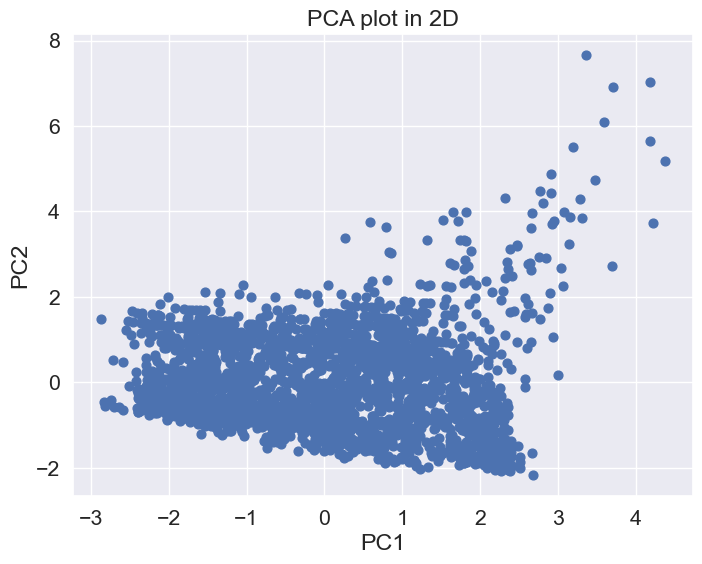

In [6]:
plt.figure(figsize=(8,6))

plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], s=40)

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Метод k-средних

Метод логтя. Ищем инерцию

In [7]:
import sklearn.cluster as cluster
from tqdm import tqdm

inertia = []
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 19.17it/s]


Метод силуэта

In [8]:
from sklearn.metrics import silhouette_score

silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(X)
    silhouette[i] = silhouette_score(X, kmeans.labels_, metric='euclidean')

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.46it/s]


Выводим

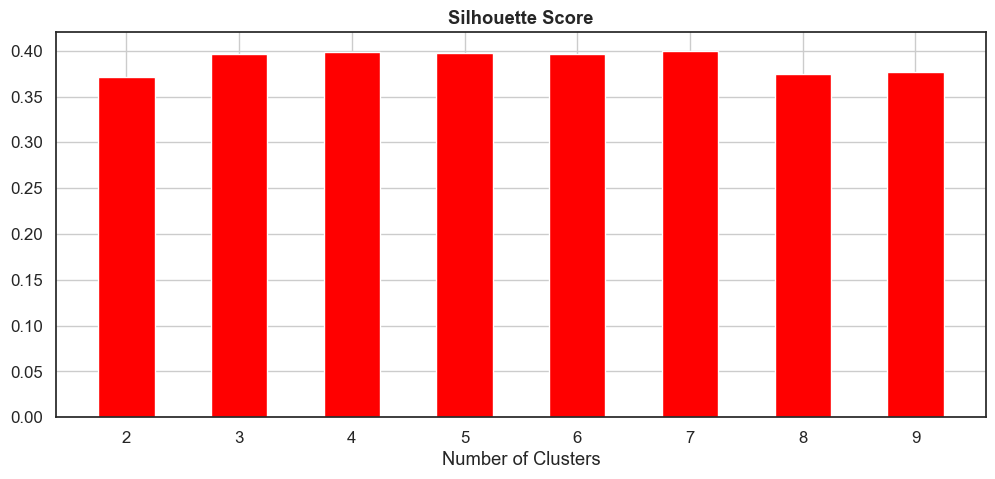

In [9]:
sns.set(style='white',font_scale=1.1, rc={'figure.figsize':(12,5)})



plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'red',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title('Silhouette Score',fontweight='bold')
plt.xlabel('Number of Clusters')


plt.show()

In [10]:
kmeans = KMeans(n_clusters=7, n_init=15, max_iter=500, random_state=0)

clusters = kmeans.fit_predict(X)

centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

silhouette_avg = silhouette_score(X, clusters)
print(f"Silhouette Score: {silhouette_avg}")

C:\Users\neekeka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


Silhouette Score: 0.4008627812878409


In [11]:
silhouette_avg = silhouette_score(X_pca, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4113976406769188


# PCA для k-средних

**PCA plot in 2D coloured by cluster**

Text(0, 0.5, 'PC2')

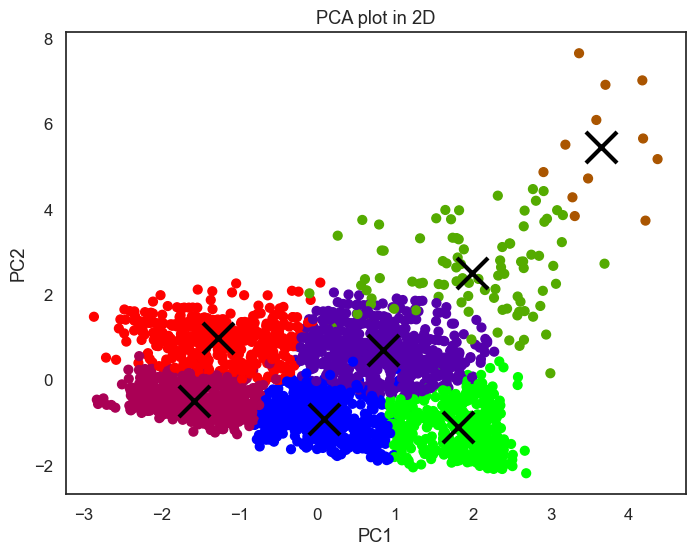

In [12]:
plt.figure(figsize=(8,6))

plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], c=clusters, cmap="brg", s=40)
plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1], marker="x", s=500, linewidths=3, color="black")

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [13]:
silhouette_avg = silhouette_score(X_pca, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4113976406769188


# t-SNE для k-средних

In [14]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

tsne_df = pd.DataFrame(data = X_tsne, columns = ['tsne comp. 1', 'tsne comp. 2'])

print(tsne_df.shape)
tsne_df.head()

(2557, 2)


,tsne comp. 1,tsne comp. 2
0,-50.608433,-9.899182
1,-43.271561,0.411194
2,-33.398270,25.903875
3,-35.784508,0.219351
4,-47.796341,-7.205057


**t-SNE plot in 2D coloured by class**

Text(0, 0.5, 'tsne component 2')

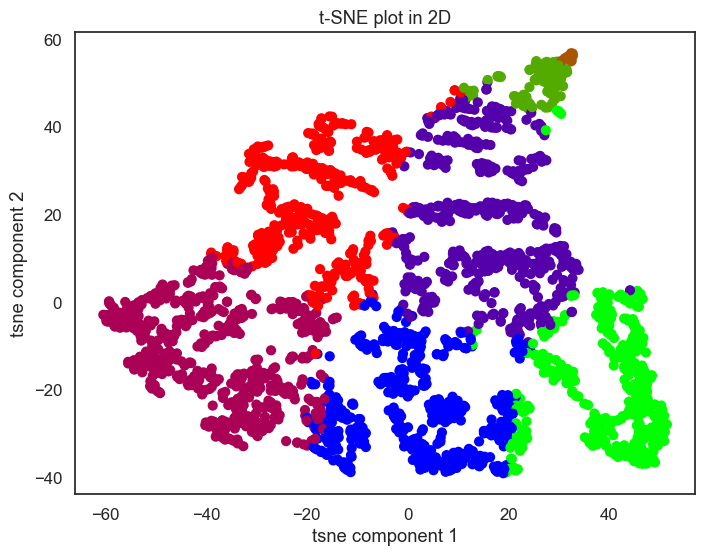

In [15]:
plt.figure(figsize=(8,6))

plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], c=clusters, cmap="brg", s=40)

plt.title('t-SNE plot in 2D')
plt.xlabel('tsne component 1')
plt.ylabel('tsne component 2')

In [16]:
silhouette_avg = silhouette_score(X_tsne, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.33931833505630493


# Метод Агломеративно-иерархической кластеризации

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

linkage_matrix = linkage(X, method='ward')

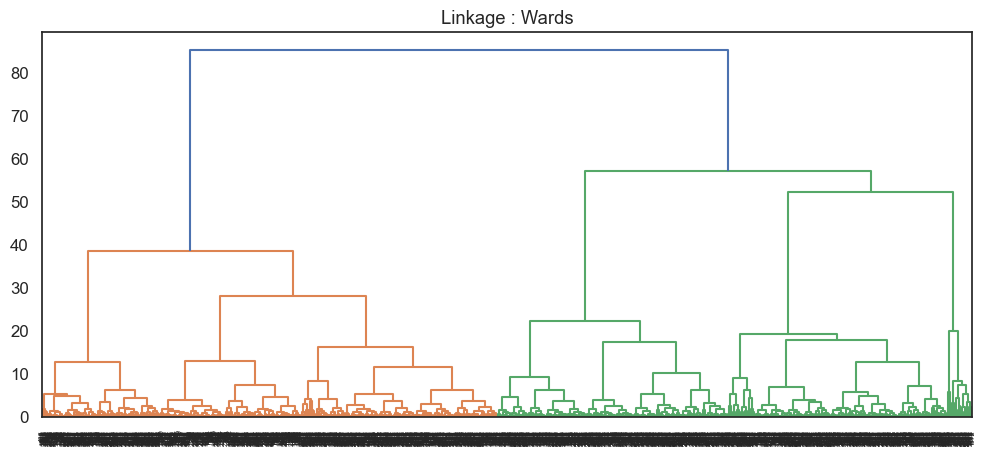

In [18]:
plt.title('Linkage : Wards')
dendrogram(linkage_matrix);

In [19]:
ac = AgglomerativeClustering(n_clusters=7)
ac.fit(X)
labels_ac = ac.labels_

In [20]:
silhouette_avg = silhouette_score(X, labels_ac)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.2945269796386298


# PCA для иерархической кластеризации

**PCA plot in 2D coloured by cluster**

Text(0, 0.5, 'PC2')

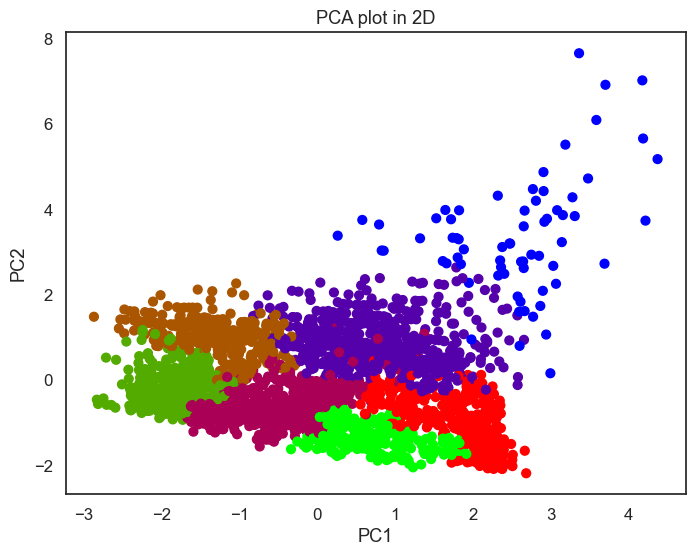

In [21]:
plt.figure(figsize=(8,6))

plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], c=labels_ac, cmap="brg", s=40)

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [22]:
silhouette_avg = silhouette_score(X_pca, labels_ac)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3170046275320675


# t-SNE для иерархической кластеризации

In [23]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

tsne_df = pd.DataFrame(data = X_tsne, columns = ['tsne comp. 1', 'tsne comp. 2'])

print(tsne_df.shape)
tsne_df.head()

(2557, 2)


,tsne comp. 1,tsne comp. 2
0,-50.608433,-9.899182
1,-43.271561,0.411194
2,-33.398270,25.903875
3,-35.784508,0.219351
4,-47.796341,-7.205057


**t-SNE plot in 2D coloured by class**

Text(0, 0.5, 'tsne component 2')

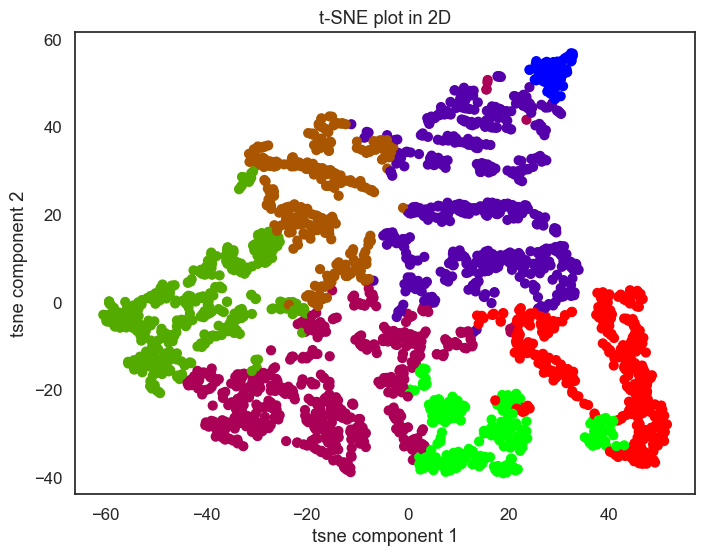

In [24]:
plt.figure(figsize=(8,6))

plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], c=labels_ac, cmap="brg", s=40)

plt.title('t-SNE plot in 2D')
plt.xlabel('tsne component 1')
plt.ylabel('tsne component 2')

In [25]:
silhouette_avg = silhouette_score(X_tsne, labels_ac)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.29549452662467957
